In [1]:
import fpcluster as fc
import numpy as np
import numba as nb
from numba import jit
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import sklearn
import matplotlib
from thesis_toolbox.plot.tools import add_letter
from DUST import map_terrain_china
from ipywidgets import interact, interactive, fixed, interact_manual
# %matplotlib widget
%matplotlib inline

## Trajectory clustering analysis

Combining airmass trajectory with with cluster analysis is a usefull way of quantifying the influence of synoptic meteorology on dust transport. Here clustering analysis following the procedure described by Doorling et. al. 1992 is used to cluster the centroid trajectories calculated by FLEXPART.

In [17]:

def plot_clust(nclust, ncols=2):
    
    fc.plot_cluster(lons,lats,height,km.KMeans[nclust].labels_,vmin=500, vmax=5000, add_colorbar=True,
                   figsize=(16,12),ncols=ncols)


In [10]:
lons,lats,height, mean_topo = fc.read_trajectories(['test_files/trajec_20190331_20190306.txt', 
                      'test_files/trajec_20190430_20190401.txt', 
                      'test_files/trajec_20190531_20190501.txt'])
height = height-mean_topo

In [11]:
km = fc.Adaptive_KMeans(lons,lats,height-mean_topo)
km.cluster(kmax=30)

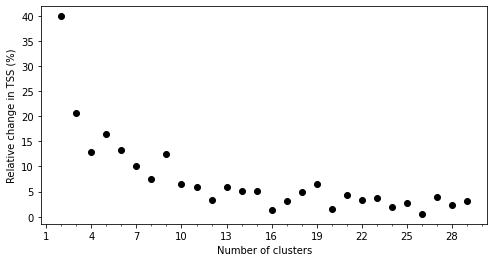

In [12]:
fig = plt.figure(figsize=(8,4))
km.score_plot()

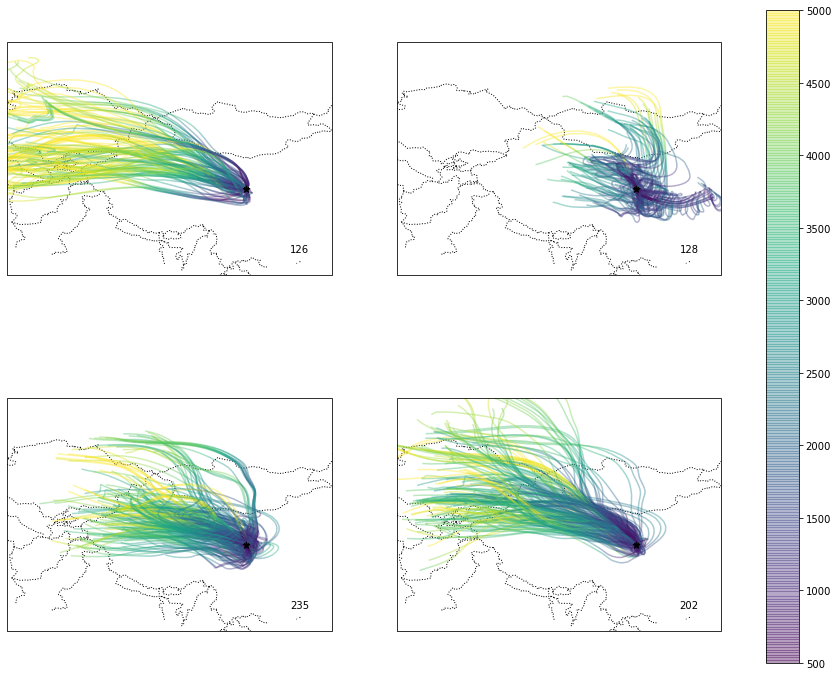

In [18]:
plot_clust(4)
# plt.show()